# Clusterização utilizando K-Means, DBSCAN e Hierarchical - Base de Dados Pessoa Jurídica

In [28]:
#importando biblotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (
    KMeans, DBSCAN
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [29]:
df_pj = pd.read_csv('../dados/PJ_tratados.csv')

In [30]:
def describe(df):
    # viewing descriptive df_pf
    desc = pd.DataFrame(index=list(df))
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = df.nunique() / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['type'] = df.dtypes
    desc = pd.concat([desc, df.describe().T.drop('count', axis=1)], axis=1)
    return desc

In [31]:
describe(df_pj)

count  nunique     %unique  null     type  \
Unnamed: 0                      79059    79059  100.000000     0    int64   
ID Cliente                      79059    11468   14.505622     0   object   
Linha de Ação                   79059        7    0.008854     0   object   
Produto GPOM                    79059       87    0.110044     0   object   
Data de Venda                   79059     1149    1.453345     0   object   
Cidade                          79059      329    0.416145     0   object   
Classe de Serviço               79059       91    0.115104     0   object   
Micro_regiao                    79059       36    0.045536     0   object   
Porte                           79059        5    0.006324     0   object   
Estado                          79059        2    0.002530     0   object   
Fim de Vigência                 79059     1906    2.410858     0   object   
Tipo Pessoa                     79059        1    0.001265     0   object   
Setor IBGE                      79059        5    0.006324     0   object   
Área de Atuação                 79059       35    0.044271     0   object   
Área de Atuação e Produto GPOM  79059      190    0.240327     0   object   
Tempo de Contrato               78849        4    0.005060   210   object   
Longitude                       79059      330    0.417410     0  float64   
Latitude                        79059      330    0.417410     0  float64   
Código CNAE                     79059      855    1.081471     0   object   
Descrição CNAE                  79059      855    1.081471     0   object   
Divisão CNAE                    79059       82    0.103720     0    int64   

                                        mean           std        min  \
Unnamed: 0                      40258.362931  23228.872275   0.000000   
ID Cliente                               NaN           NaN        NaN   
Linha de Ação                            NaN           NaN        NaN   
Produto GPOM                             NaN           NaN        NaN   
Data de Venda                            NaN           NaN        NaN   
Cidade                                   NaN           NaN        NaN   
Classe de Serviço                        NaN           NaN        NaN   
Micro_regiao                             NaN           NaN        NaN   
Porte                                    NaN           NaN        NaN   
Estado                                   NaN           NaN        NaN   
Fim de Vigência                          NaN           NaN        NaN   
Tipo Pessoa                              NaN           NaN        NaN   
Setor IBGE                               NaN           NaN        NaN   
Área de Atuação                          NaN           NaN        NaN   
Área de Atuação e Produto GPOM           NaN           NaN        NaN   
Tempo de Contrato                        NaN           NaN        NaN   
Longitude                         -51.173333      1.634104 -54.582689   
Latitude                          -24.841829      0.978503 -26.483868   
Código CNAE                              NaN           NaN        NaN   
Descrição CNAE                           NaN           NaN        NaN   
Divisão CNAE                       34.673598     21.945439   1.000000   

                                         25%           50%           75%  \
Unnamed: 0                      20211.500000  40209.000000  60327.500000   
ID Cliente                               NaN           NaN           NaN   
Linha de Ação                            NaN           NaN           NaN   
Produto GPOM                             NaN           NaN           NaN   
Data de Venda                            NaN           NaN           NaN   
Cidade                                   NaN           NaN           NaN   
Classe de Serviço                        NaN           NaN           NaN   
Micro_regiao                             NaN           NaN           NaN   
Porte                                    NaN  

In [32]:
df_pj.drop('Tempo de Contrato', axis=1)
df_pj.head()

Unnamed: 0 ID Cliente Linha de Ação        Produto GPOM Data de Venda  \
0           0        550      EDUCACAO  EDUCACAO EXECUTIVA    2021-07-29   
1           2        550      EDUCACAO  EDUCACAO EXECUTIVA    2022-12-01   
2           3        550      EDUCACAO  EDUCACAO EXECUTIVA    2022-12-15   
3           4        367      EDUCACAO  EDUCACAO EXECUTIVA    2023-10-16   
4           5        550      EDUCACAO           GRADUACAO    2022-11-24   

     Cidade                                  Classe de Serviço Micro_regiao  \
0  CURITIBA          PROGRAMAS NACIONAIS DE EDUCACAO EXECUTIVA     CURITIBA   
1  CURITIBA  CURSOS E PROGRAMAS NACIONAIS EM GESTAO EMPRESA...     CURITIBA   
2  CURITIBA  CURSOS E PROGRAMAS NACIONAIS EM GESTAO EMPRESA...     CURITIBA   
3  CURITIBA  CURSOS E PROGRAMAS NACIONAIS EM GESTAO EMPRESA...     CURITIBA   
4  CURITIBA                  GRADUACAO TECNOLOGICA A DISTANCIA     CURITIBA   

    Porte Estado  ... Tipo Pessoa    Setor IBGE Área de Atuação  \
0  GRANDE     PR  ...    JURÍDICA  04. SERVIÇOS   NÃO INFORMADO   
1  GRANDE     PR  ...    JURÍDICA  04. SERVIÇOS   NÃO INFORMADO   
2  GRANDE     PR  ...    JURÍDICA  04. SERVIÇOS   NÃO INFORMADO   
3   MÉDIA     PR  ...    JURÍDICA  04. SERVIÇOS   NÃO INFORMADO   
4  GRANDE     PR  ...    JURÍDICA  04. SERVIÇOS   NÃO INFORMADO   

       Área de Atuação e Produto GPOM Tempo de Contrato  Longitude   Latitude  \
0  EDUCACAO EXECUTIVA / NÃO INFORMADO    Menos de 1 ano -49.264622 -25.419547   
1  EDUCACAO EXECUTIVA / NÃO INFORMADO        1 a 2 anos -49.264622 -25.419547   
2  EDUCACAO EXECUTIVA / NÃO INFORMADO    Menos de 1 ano -49.264622 -25.419547   
3  EDUCACAO EXECUTIVA / NÃO INFORMADO    Menos de 1 ano -49.264622 -25.419547   
4           GRADUACAO / NÃO INFORMADO    Menos de 1 ano -49.264622 -25.419547   

   Código CNAE                                     Descrição CNAE Divisão CNAE  
0    4911-6/00                    TRANSPORTE FERROVIÁRIO DE CARGA           49  
1    4911-6/00                    TRANSPORTE FERROVIÁRIO DE CARGA           49  
2    4911-6/00                    TRANSPORTE FERROVIÁRIO DE CARGA           49  
3    8599-6/99  OUTRAS ATIVIDADES DE ENSINO NÃO ESPECIFICADAS ...           85  
4    4911-6/00                    TRANSPORTE FERROVIÁRIO DE CARGA           49  

[5 rows x 21 columns]

In [33]:
df_pj['Data de Venda'] = pd.to_datetime(df_pj['Data de Venda'])
df_pj['Fim de Vigência'] = pd.to_datetime(df_pj['Fim de Vigência'])
df_pj['Tempo de Contrato'] = df_pj['Fim de Vigência'] - df_pj['Data de Venda']
df_pj['Tempo de Contrato'] = df_pj['Tempo de Contrato'].astype('int')

In [34]:
describe(df_pj)

count  nunique     %unique  null  \
Unnamed: 0                      79059    79059  100.000000     0   
ID Cliente                      79059    11468   14.505622     0   
Linha de Ação                   79059        7    0.008854     0   
Produto GPOM                    79059       87    0.110044     0   
Data de Venda                   79059     1149    1.453345     0   
Cidade                          79059      329    0.416145     0   
Classe de Serviço               79059       91    0.115104     0   
Micro_regiao                    79059       36    0.045536     0   
Porte                           79059        5    0.006324     0   
Estado                          79059        2    0.002530     0   
Fim de Vigência                 79059     1906    2.410858     0   
Tipo Pessoa                     79059        1    0.001265     0   
Setor IBGE                      79059        5    0.006324     0   
Área de Atuação                 79059       35    0.044271     0   
Área de Atuação e Produto GPOM  79059      190    0.240327     0   
Tempo de Contrato               79059      960    1.214283     0   
Longitude                       79059      330    0.417410     0   
Latitude                        79059      330    0.417410     0   
Código CNAE                     79059      855    1.081471     0   
Descrição CNAE                  79059      855    1.081471     0   
Divisão CNAE                    79059       82    0.103720     0   

                                          type                           mean  \
Unnamed: 0                               int64                   40258.362931   
ID Cliente                              object                            NaN   
Linha de Ação                           object                            NaN   
Produto GPOM                            object                            NaN   
Data de Venda                   datetime64[ns]  2022-01-12 00:12:27.512617216   
Cidade                                  object                            NaN   
Classe de Serviço                       object                            NaN   
Micro_regiao                            object                            NaN   
Porte                                   object                            NaN   
Estado                                  object                            NaN   
Fim de Vigência                 datetime64[ns]  2023-03-10 14:12:48.550070016   
Tipo Pessoa                             object                            NaN   
Setor IBGE                              object                            NaN   
Área de Atuação                         object                            NaN   
Área de Atuação e Produto GPOM          object                            NaN   
Tempo de Contrato                        int64            36511221037453040.0   
Longitude                              float64                     -51.173333   
Latitude                               float64                     -24.841829   
Código CNAE                             object                            NaN   
Descrição CNAE                          object                            NaN   
Divisão CNAE                             int64                      34.673598   

                                                min                  25%  \
Unnamed: 0                                      0.0              20211.5   
ID Cliente                                      NaN                  NaN   
Linha de Ação                                   NaN                  NaN   
Produto GPOM                                    NaN                  NaN   
Data de Venda                   2019-01-14 00:00:00  2021-06-01 00:00:00   
Cidade                                          NaN                  NaN   
Classe de Serviço                               NaN                  NaN   
Micro_regiao                                    NaN                  NaN   
Porte                                           NaN                 

In [35]:
colunas_excluir = ['Unnamed: 0', 'Data de Venda', 'Fim de Vigência', 'Descrição CNAE', 'Latitude', 'Longitude', 'Tipo Pessoa']
df_pj = df_pj.drop(colunas_excluir, axis=1)


In [36]:
# Codificação de variáveis categóricas
colunas_categoricas = df_pj.select_dtypes(include=['object']).columns
colunas_categoricas


Index(['ID Cliente', 'Linha de Ação', 'Produto GPOM', 'Cidade',
       'Classe de Serviço', 'Micro_regiao', 'Porte', 'Estado', 'Setor IBGE',
       'Área de Atuação', 'Área de Atuação e Produto GPOM', 'Código CNAE'],
      dtype='object')

In [37]:
label_encoder = LabelEncoder()
df_pj[colunas_categoricas] = df_pj[colunas_categoricas].apply(label_encoder.fit_transform)


In [38]:
# Normalização das colunas numéricas
colunas_numericas = df_pj.select_dtypes(include=['float64', 'int']).columns
colunas_numericas


Index(['ID Cliente', 'Linha de Ação', 'Produto GPOM', 'Cidade',
       'Classe de Serviço', 'Micro_regiao', 'Porte', 'Estado', 'Setor IBGE',
       'Área de Atuação', 'Área de Atuação e Produto GPOM',
       'Tempo de Contrato', 'Código CNAE', 'Divisão CNAE'],
      dtype='object')

In [39]:
scaler = StandardScaler()
scaler.fit(df_pj)
scaled_df_pj = pd.DataFrame(scaler.transform(df_pj),columns= df_pj.columns )
print("Todos os atributos estão normalizados")

Todos os atributos estão normalizados


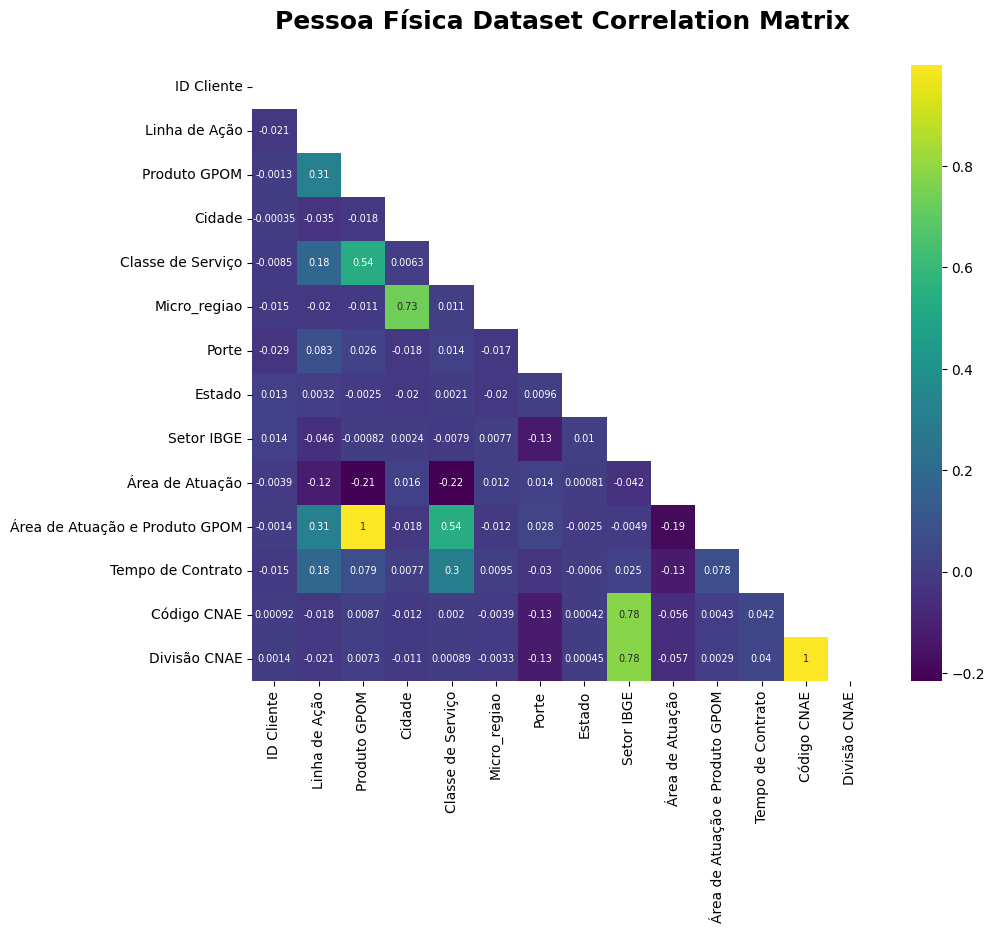

In [40]:
def heatmap(dataset, label = None):
    corr = dataset.corr(method = 'spearman')
    plt.figure(figsize = (10, 8), dpi = 100)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'viridis', annot = True, annot_kws = {'size' : 7})
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 18, weight = 'bold')
    plt.show()
heatmap(df_pj, 'Pessoa Física')


In [41]:
scaled_df_pj.head()

ID Cliente  Linha de Ação  Produto GPOM   Cidade  Classe de Serviço  \
0   -0.568091       -1.14427      0.103643 -0.75512           1.161645   
1   -0.568091       -1.14427      0.103643 -0.75512          -0.769416   
2   -0.568091       -1.14427      0.103643 -0.75512          -0.769416   
3   -0.972205       -1.14427      0.103643 -0.75512          -0.769416   
4   -0.568091       -1.14427      0.369511 -0.75512           0.466463   

   Micro_regiao     Porte    Estado  Setor IBGE  Área de Atuação  \
0     -0.696268 -1.736116  0.012824    1.671731         0.066515   
1     -0.696268 -1.736116  0.012824    1.671731         0.066515   
2     -0.696268 -1.736116  0.012824    1.671731         0.066515   
3     -0.696268  0.307245  0.012824    1.671731         0.066515   
4     -0.696268 -1.736116  0.012824    1.671731         0.066515   

   Área de Atuação e Produto GPOM  Tempo de Contrato  Código CNAE  \
0                       -0.043809          -1.380337     1.196911   
1                       -0.043809          -0.102191     1.196911   
2                       -0.043809          -1.061727     1.196911   
3                       -0.043809          -1.291422     1.935886   
4                        0.129369          -1.095069     1.196911   

   Divisão CNAE  
0      0.652823  
1      0.652823  
2      0.652823  
3      2.293266  
4      0.652823

In [27]:
pca = PCA(n_components=3)
pca.fit(scaled_df_pj)

reduce_df_pj = pca.transform(scaled_df_pj)
print('Dimentionality Reduced Data:')
print(reduce_df_pj[0])

Dimentionality Reduced Data:
[ 1.06348911  1.94711081 -0.80103702]


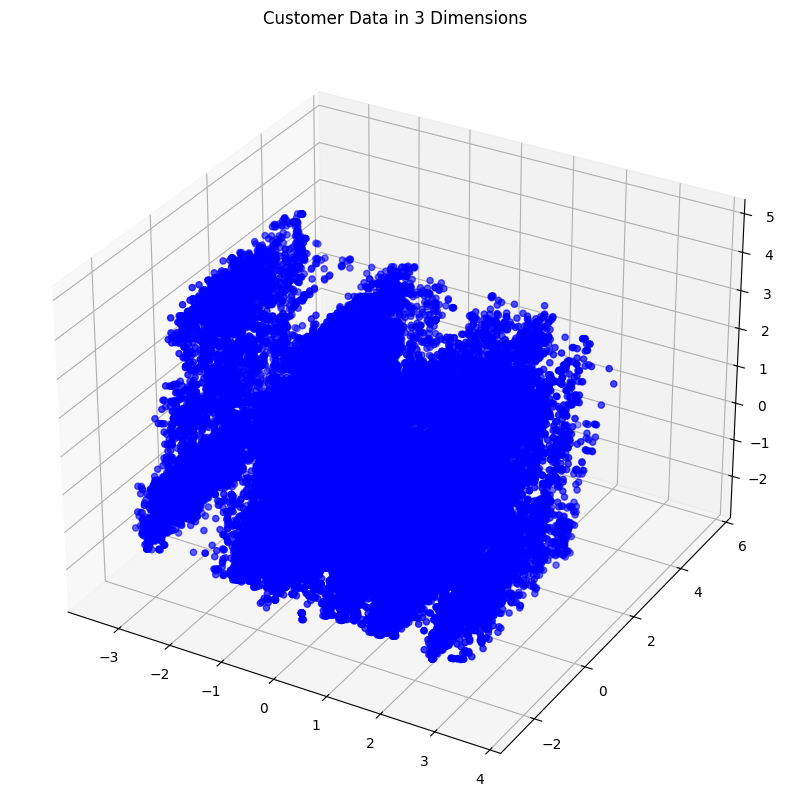

In [21]:
#plot the 3d dataset
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(reduce_df_pj.T[1],reduce_df_pj.T[2],reduce_df_pj.T[0], c="blue")
ax.set_title("Customer Data in 3 Dimensions")
plt.show()

In [20]:
for i in range(2, 6, 1):
    eps = i / 10.0
    print(f'-------- EPS = {eps} --------')
    db = DBSCAN(eps=eps, min_samples=26)
    db.fit(reduce_df_pj)
    clusters = db.labels_
    dbscan_labels = db.fit_predict(reduce_df_pj)
    dbscan_score = silhouette_score(reduce_df_pj, dbscan_labels)

    n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise_ = list(clusters).count(-1)

    print("Number of clusters: %d" % n_clusters_)
    print("Number of noise points: %d" % n_noise_)
    print(dbscan_score)

'for i in range(2, 6, 1):\n    eps = i / 10.0\n    print(f\'-------- EPS = {eps} --------\')\n    db = DBSCAN(eps=eps, min_samples=26)\n    db.fit(reduce_df_pj)\n    clusters = db.labels_\n    dbscan_labels = db.fit_predict(reduce_df_pj)\n    dbscan_score = silhouette_score(reduce_df_pj, dbscan_labels)\n\n    n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)\n    n_noise_ = list(clusters).count(-1)\n\n    print("Number of clusters: %d" % n_clusters_)\n    print("Number of noise points: %d" % n_noise_)\n    print(dbscan_score)\n'

-------- EPS = 0.31 --------
Number of clusters: 12
Number of noise points: 1636
-0.3112730118267915


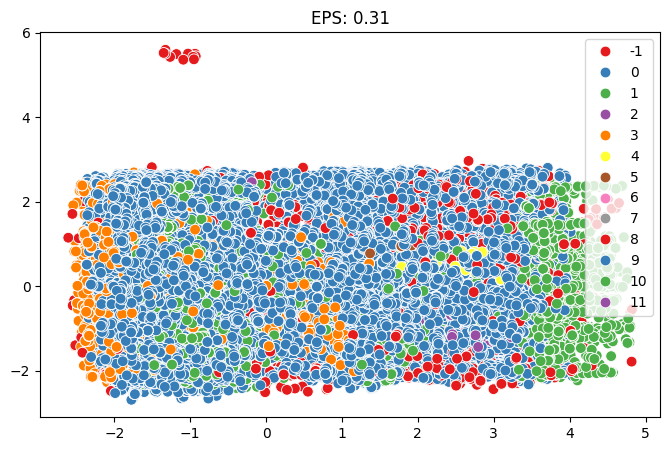

-------- EPS = 0.32 --------
Number of clusters: 12
Number of noise points: 1352
-0.30918955036222123


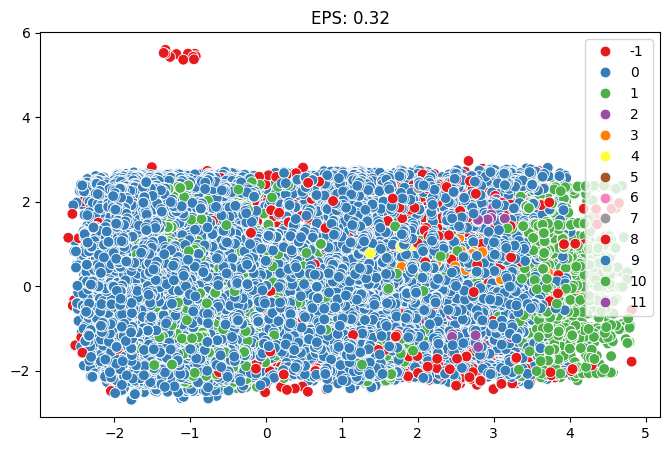

-------- EPS = 0.33 --------
Number of clusters: 11
Number of noise points: 1169
-0.35477183737540413


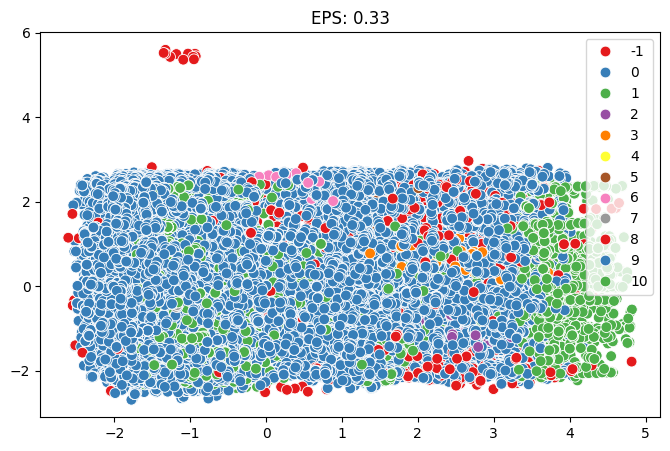

-------- EPS = 0.34 --------
Number of clusters: 8
Number of noise points: 993
-0.25806154104434337


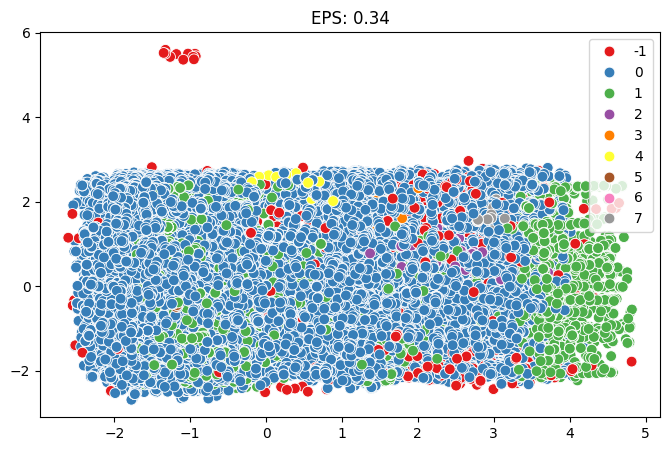

-------- EPS = 0.35 --------
Number of clusters: 8
Number of noise points: 840
-0.12329912703824547


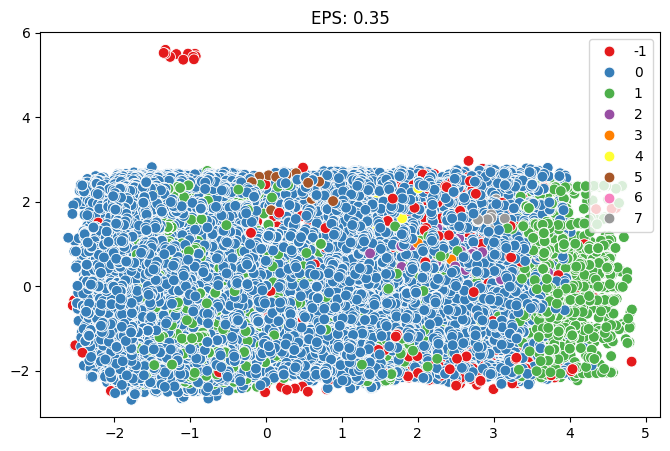

-------- EPS = 0.36 --------
Number of clusters: 7
Number of noise points: 692
-0.061754370914623796


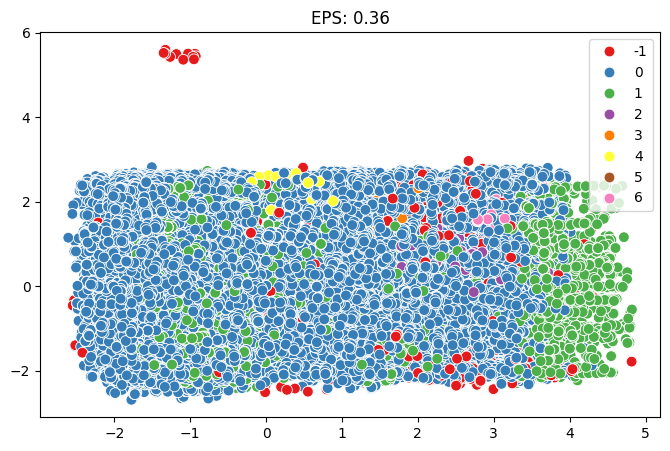

-------- EPS = 0.37 --------
Number of clusters: 4
Number of noise points: 590
0.04435704052843439


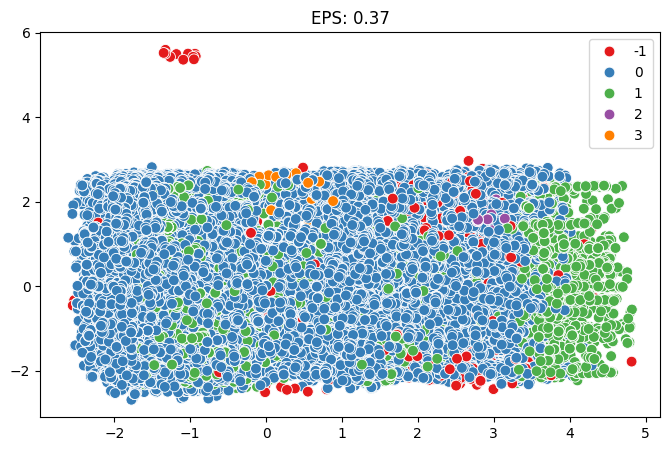

-------- EPS = 0.38 --------
Number of clusters: 2
Number of noise points: 516
0.17314406094075177


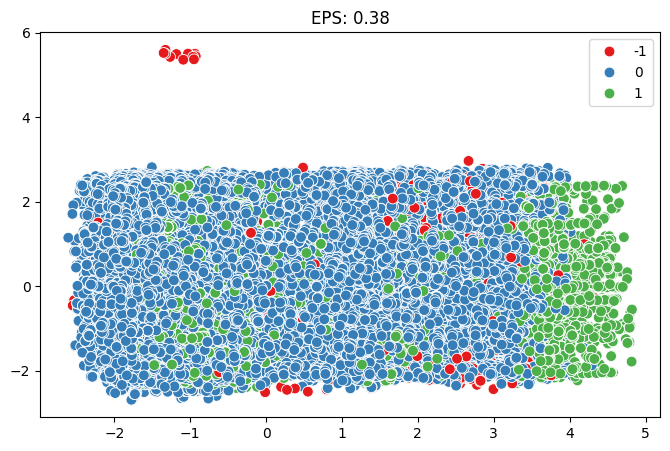

-------- EPS = 0.39 --------
Number of clusters: 3
Number of noise points: 400
0.06382461048188318


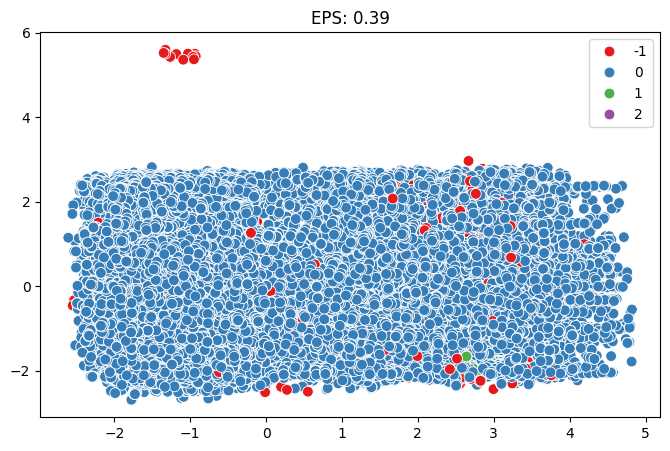

In [33]:
for i in range(31, 40, 1):
    eps = i / 100.0
    print(f'-------- EPS = {eps} --------')
    db = DBSCAN(eps=eps, min_samples=26)
    db.fit(reduce_df_pj)
    clusters = db.labels_
    dbscan_labels = db.fit_predict(reduce_df_pj)
    dbscan_score = silhouette_score(reduce_df_pj, dbscan_labels)

    n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise_ = list(clusters).count(-1)

    print("Number of clusters: %d" % n_clusters_)
    print("Number of noise points: %d" % n_noise_)
    print(dbscan_score)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=reduce_df_pj[:, 0], y=reduce_df_pj[:, 2], hue=dbscan_labels, s=60, palette='Set1')
    plt.title(f'EPS: {eps}')
    plt.show()


In [17]:
db = DBSCAN(eps=0.37, min_samples=26)
db.fit(reduce_df_pj)
clusters = db.labels_
dbscan_labels = db.fit_predict(reduce_df_pj)

In [42]:
df_pj['Clusters_DBSCAN'] = dbscan_labels


In [43]:
def plot_clusters(x, y, clusters, df=df_pj, cmap='viridis', title=f'Clusters Identificados pelo DBSCAN'):
    """
    Função para plotar um gráfico de dispersão dos clusters identificados pelo K-Means.

    Parâmetros:
    - x: Nome da coluna para o eixo x.
    - y: Nome da coluna para o eixo y.
    - clusters: Nome da coluna que contém os rótulos dos clusters.
    - df: DataFrame pandas contendo os dados (padrão: df_pf).
    - cmap: Esquema de cores a ser usado para os clusters (padrão: 'viridis').
    - title: Título do gráfico (padrão: 'Clusters Identificados pelo K-Means').
    """
    plt.scatter(df[x], df[y], c=df[clusters], cmap=cmap, s=60)
    plt.title(f'{title} - {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.colorbar(label='Clusters')
    plt.show()


In [44]:
df_pj.columns

Index(['ID Cliente', 'Linha de Ação', 'Produto GPOM', 'Cidade',
       'Classe de Serviço', 'Micro_regiao', 'Porte', 'Estado', 'Setor IBGE',
       'Área de Atuação', 'Área de Atuação e Produto GPOM',
       'Tempo de Contrato', 'Código CNAE', 'Divisão CNAE', 'Clusters_DBSCAN'],
      dtype='object')

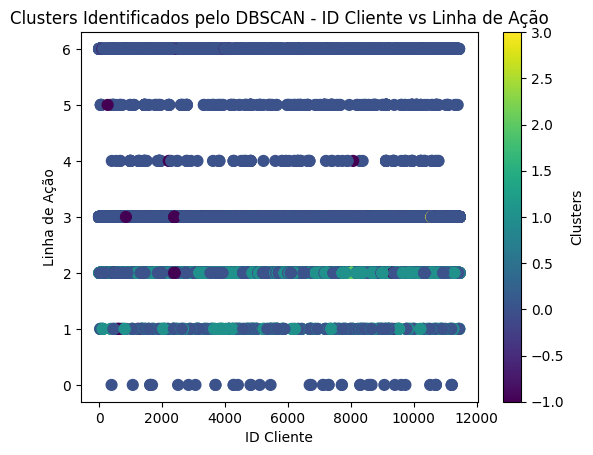

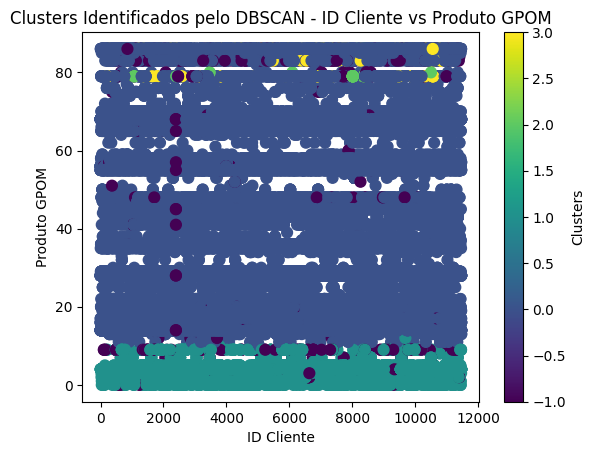

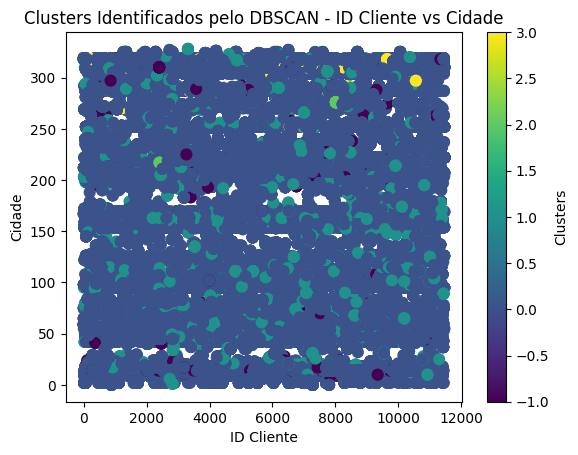

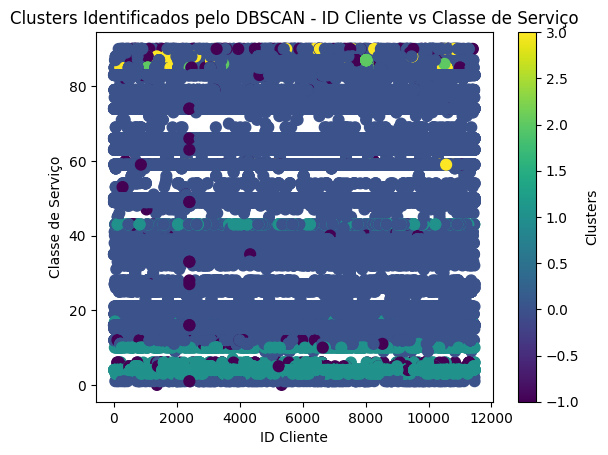

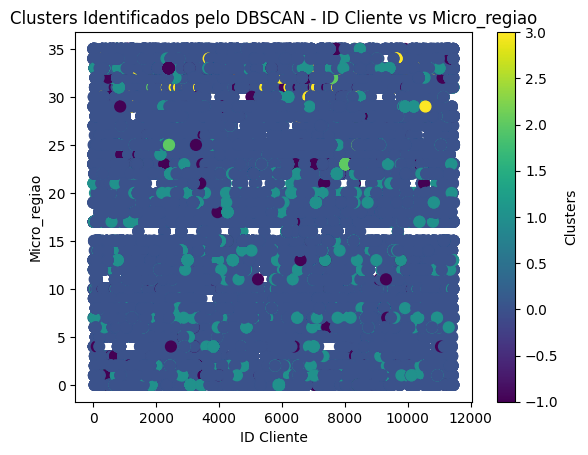

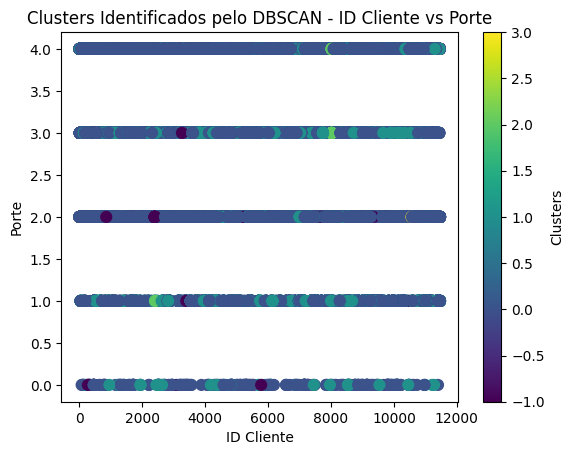

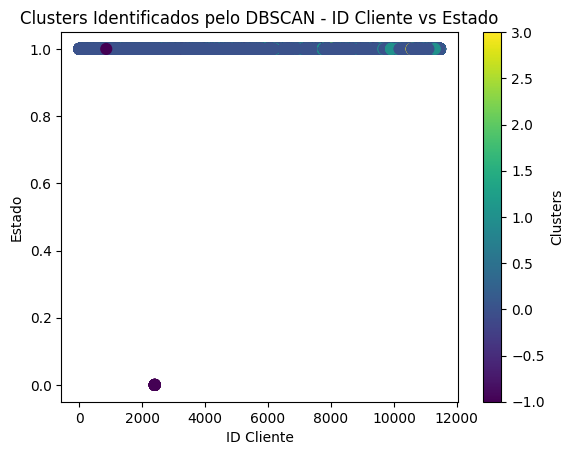

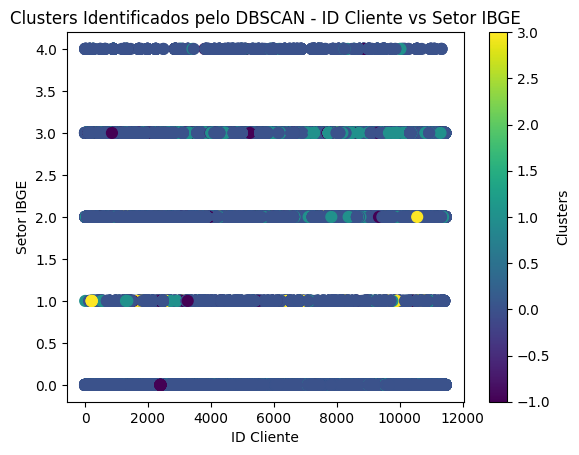

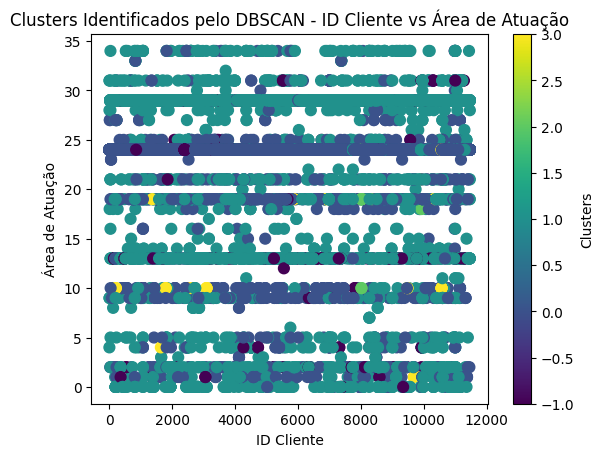

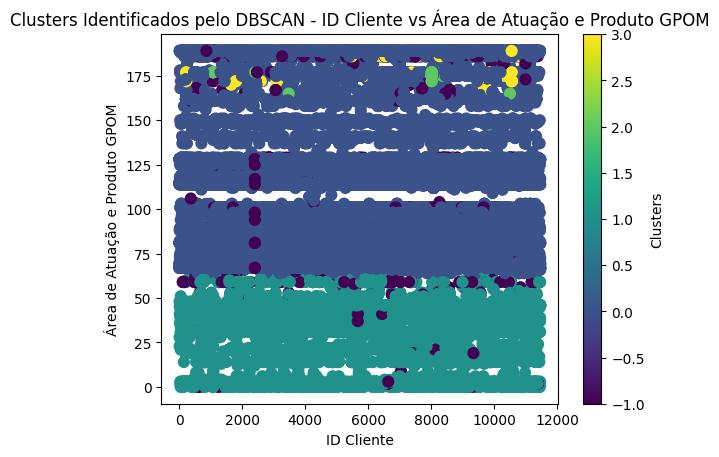

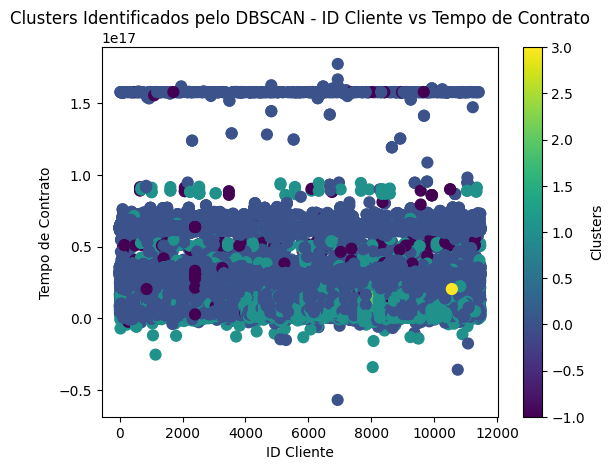

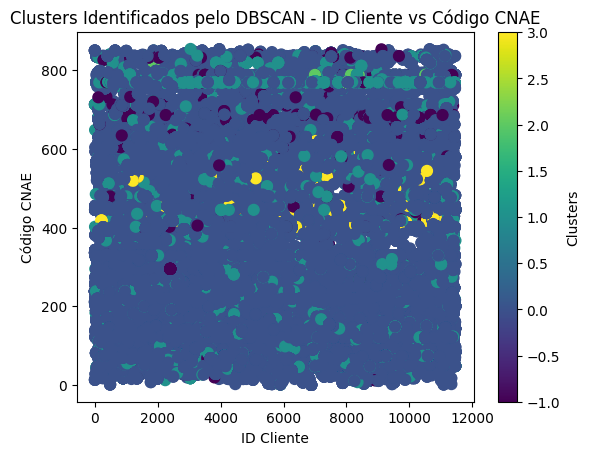

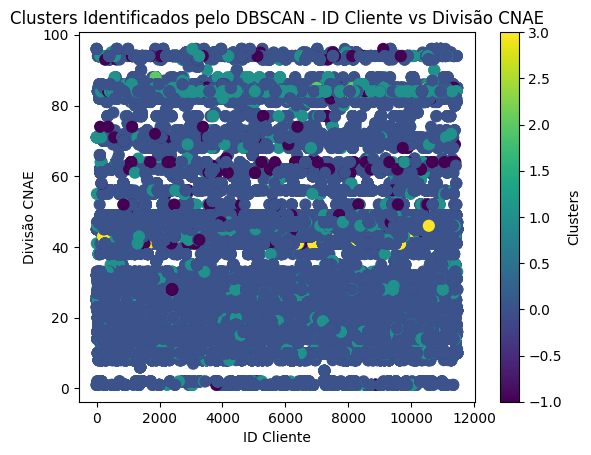

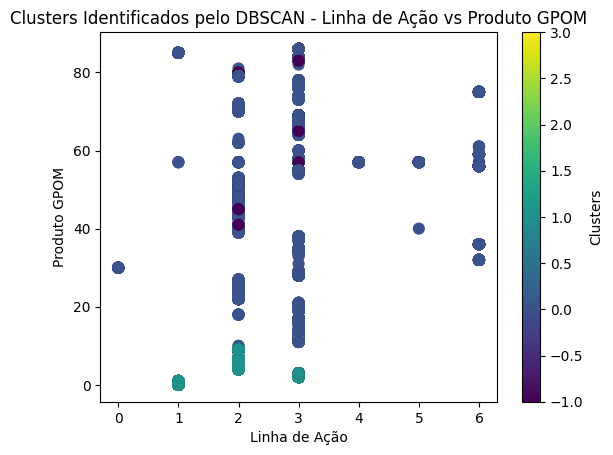

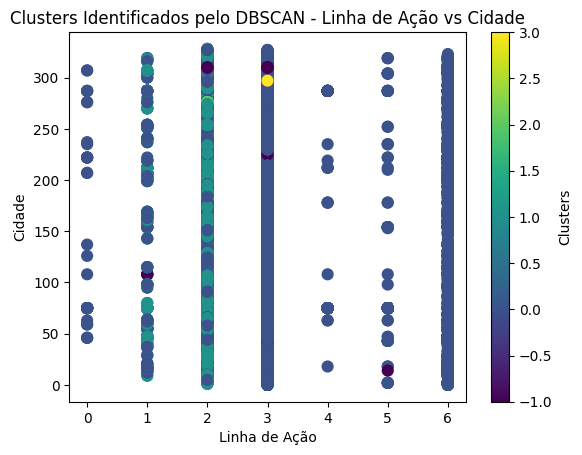

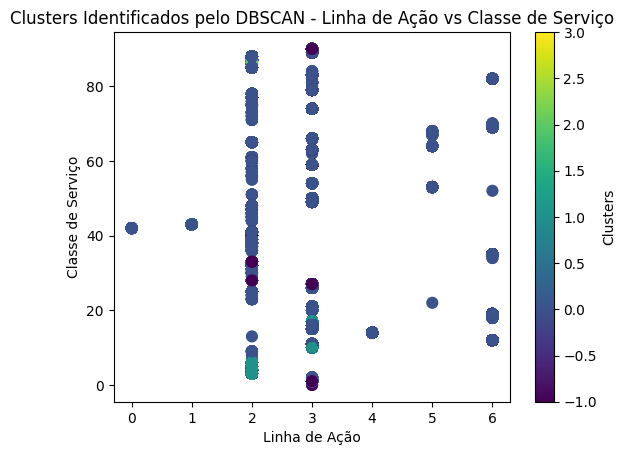

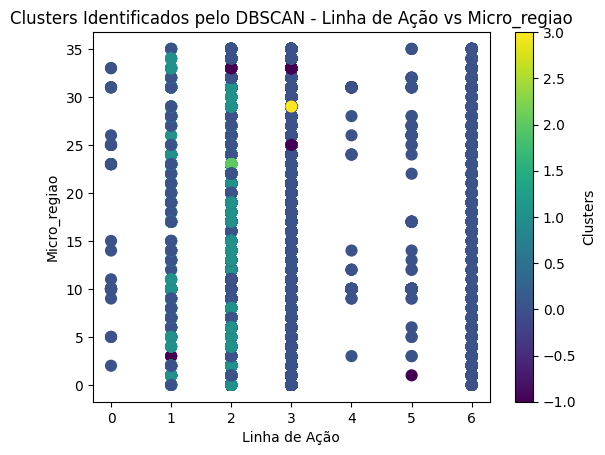

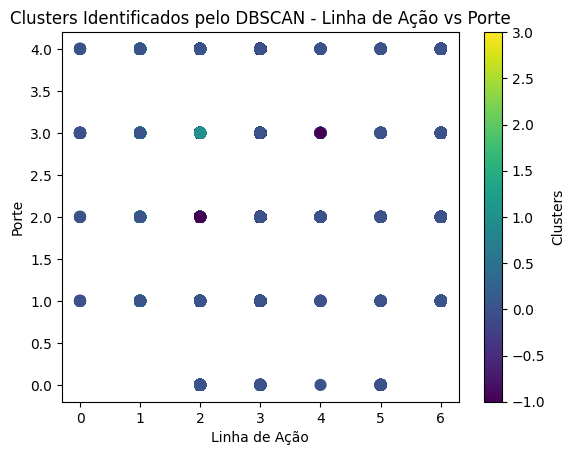

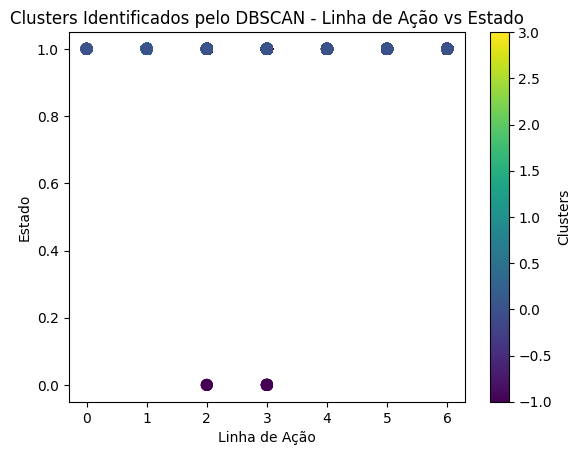

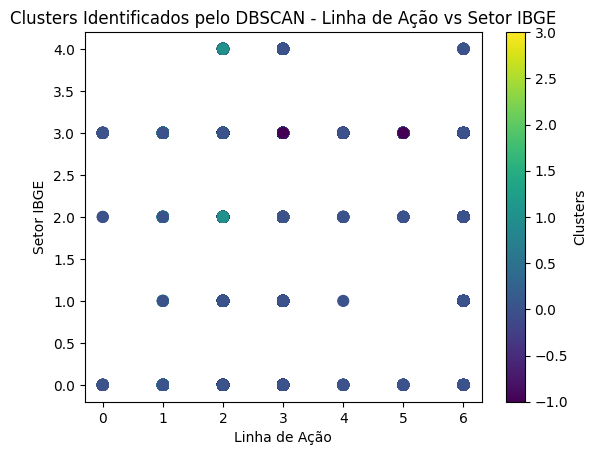

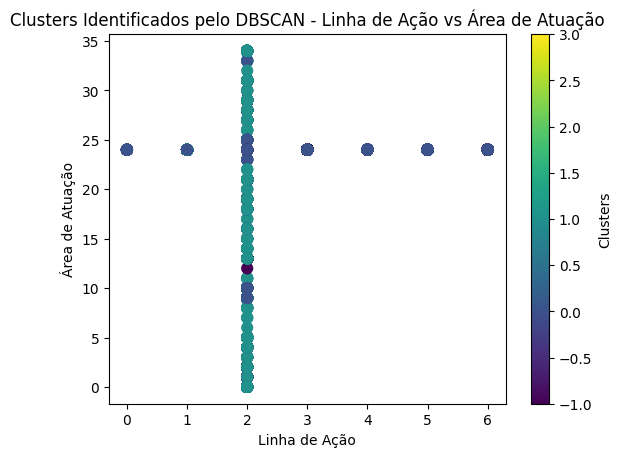

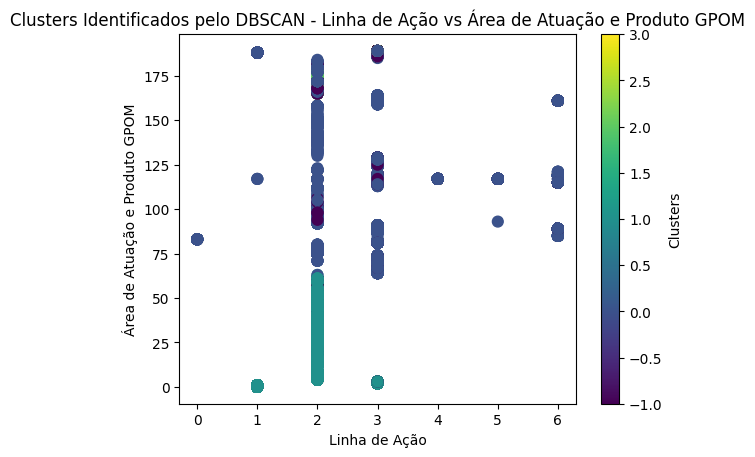

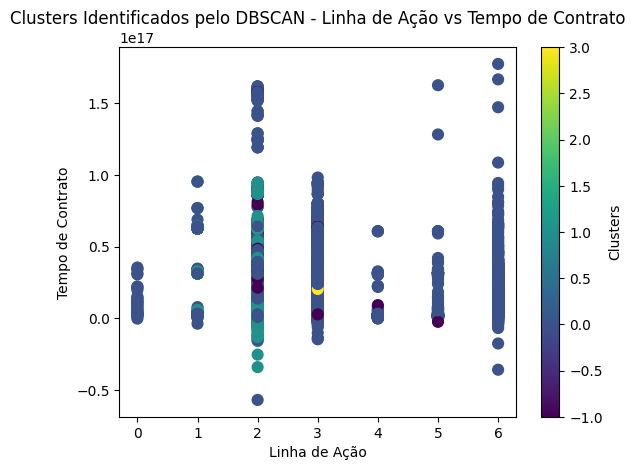

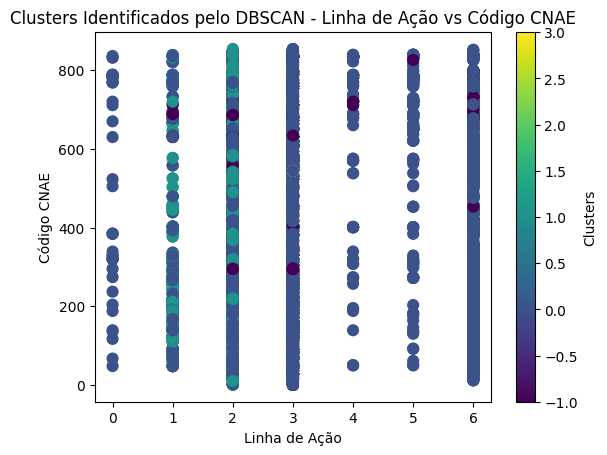

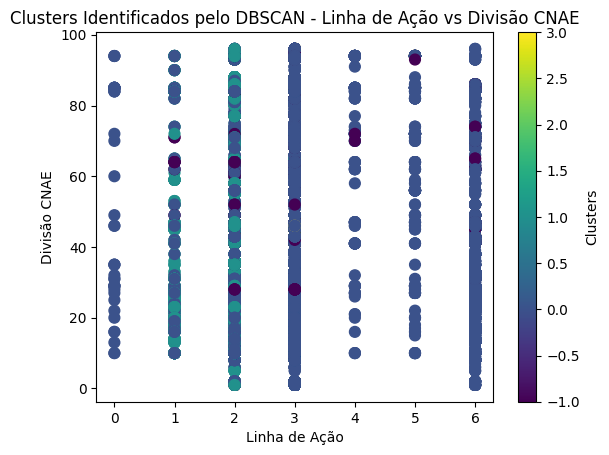

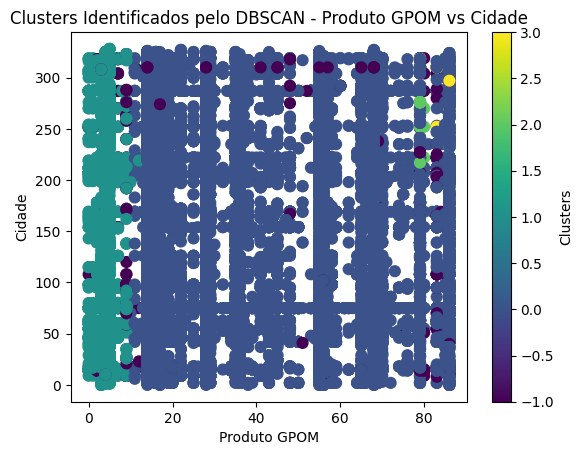

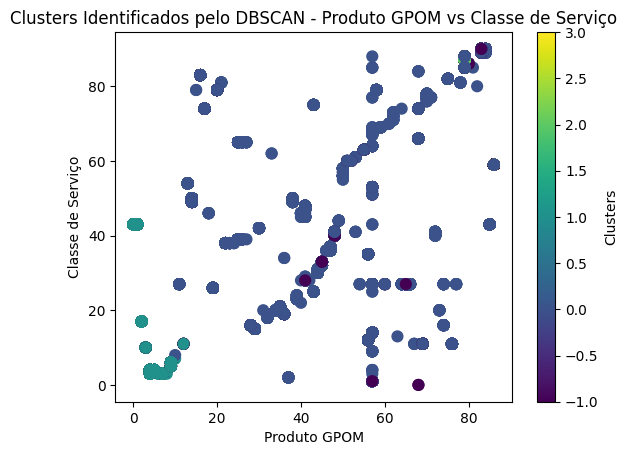

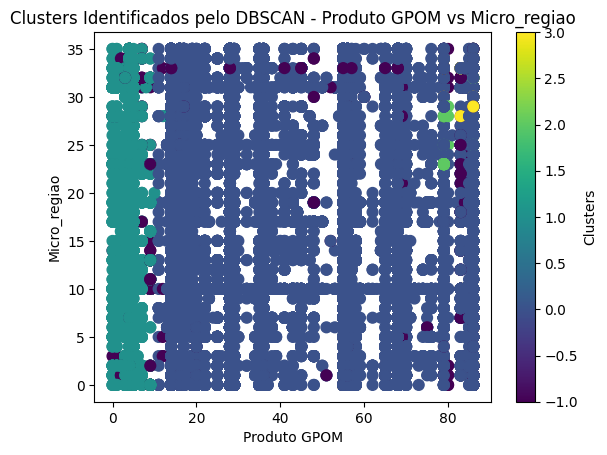

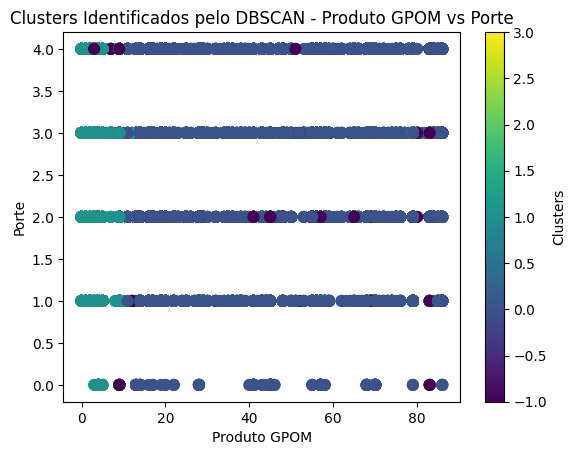

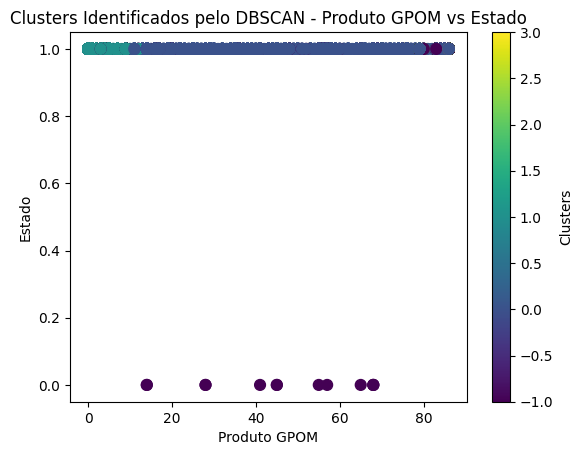

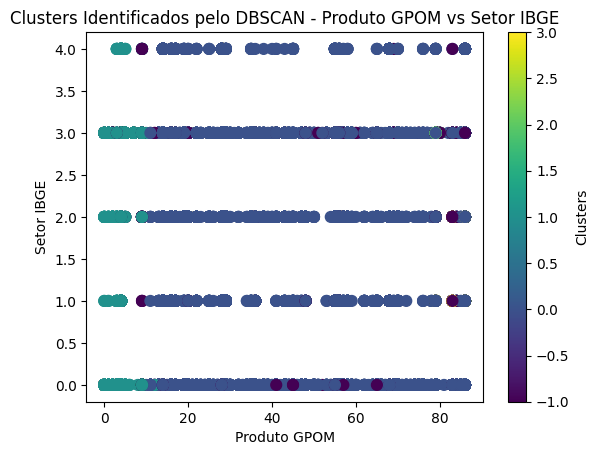

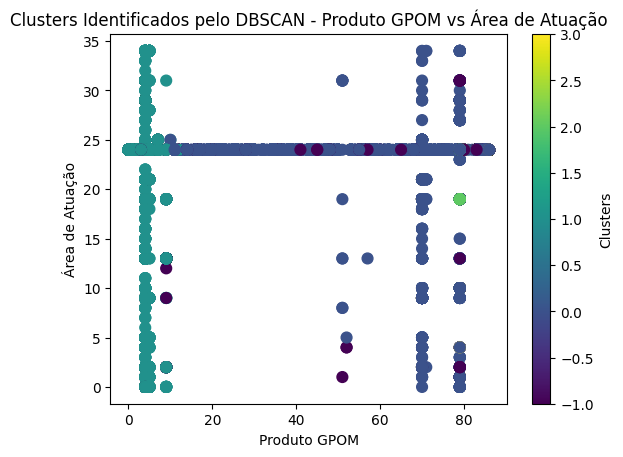

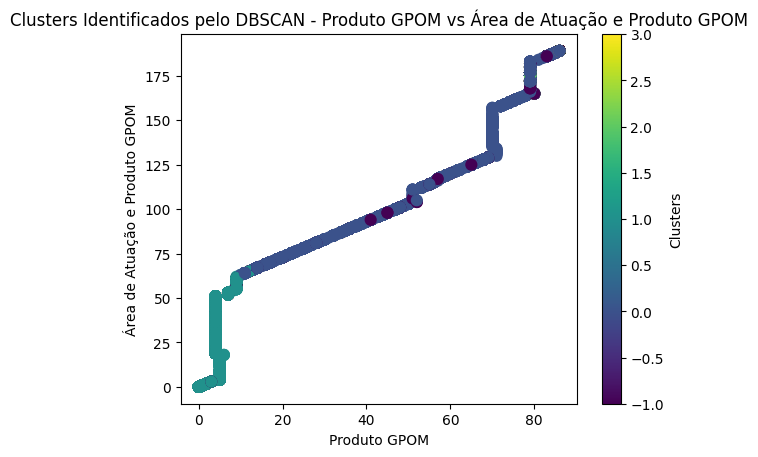

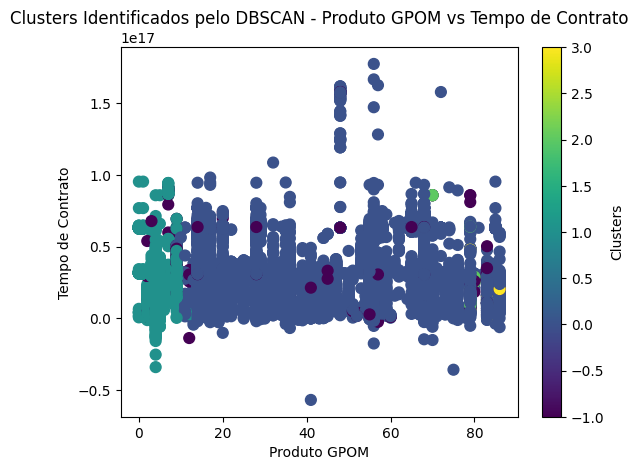

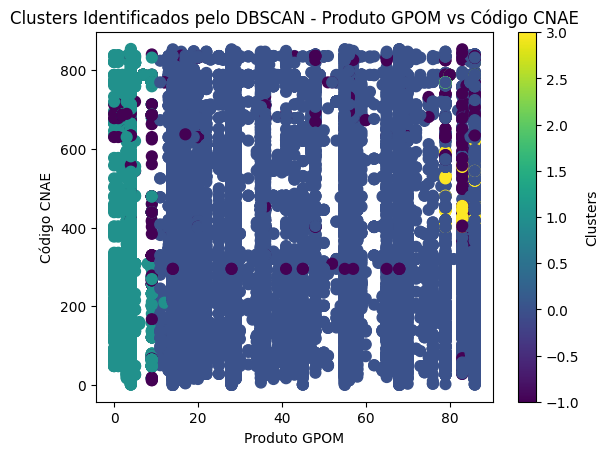

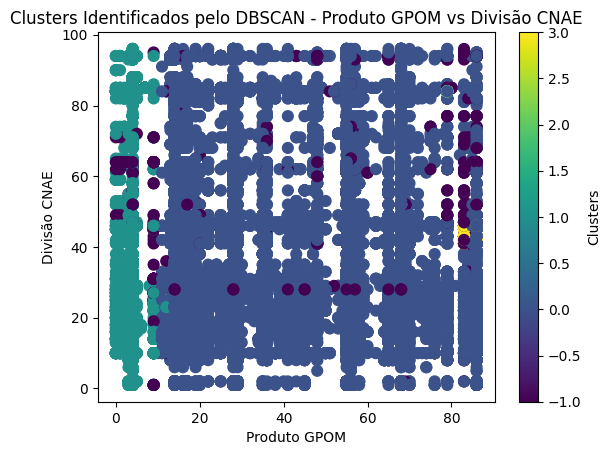

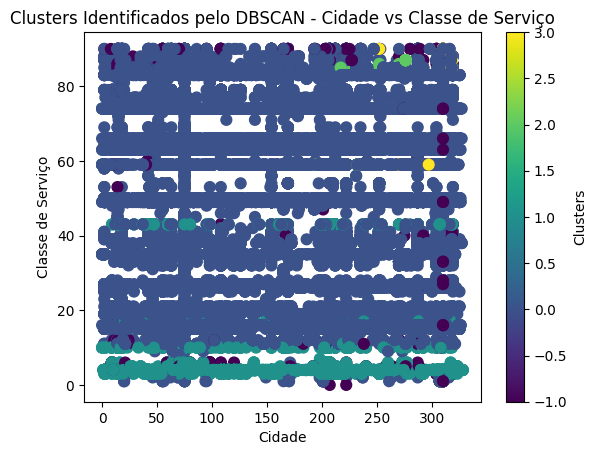

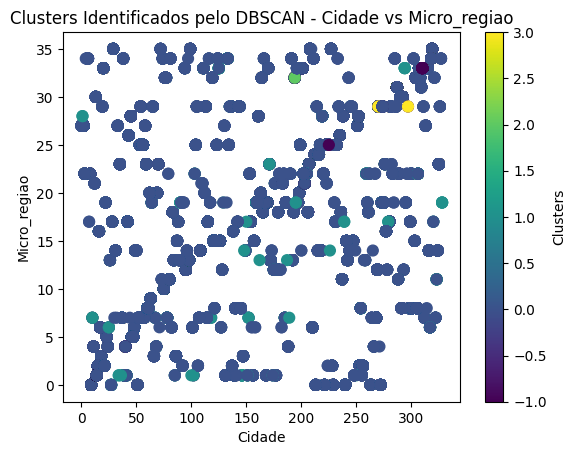

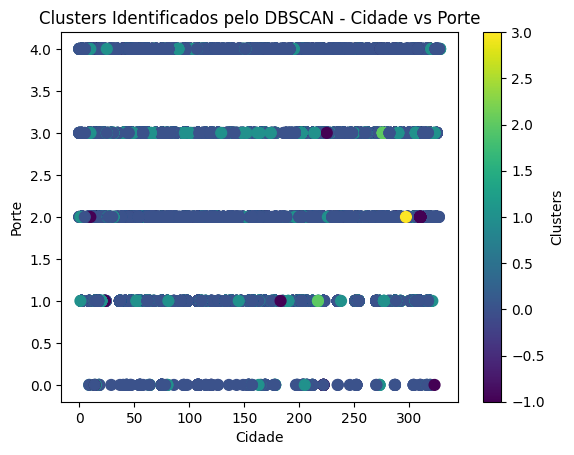

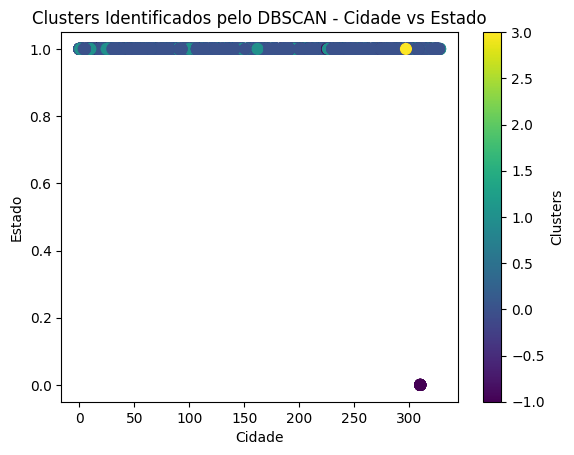

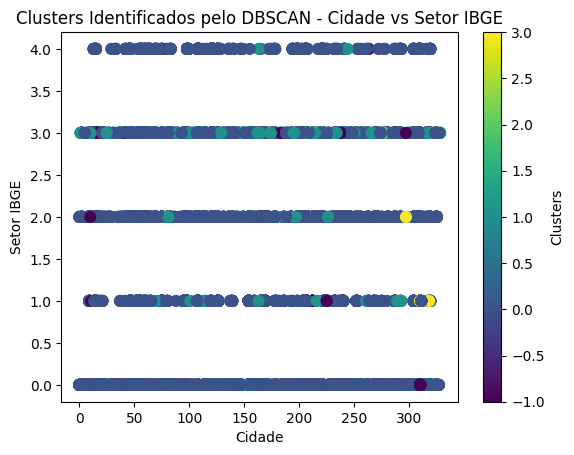

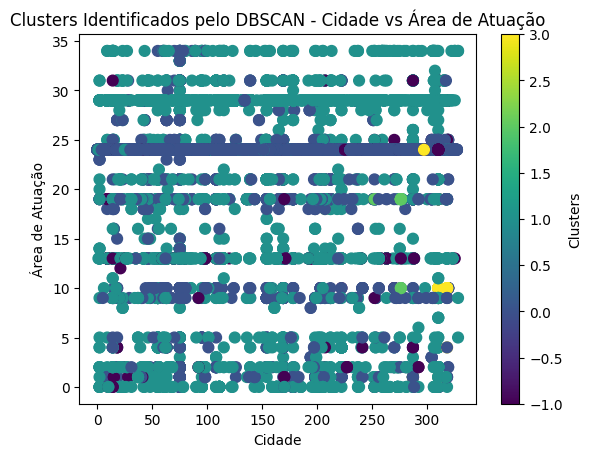

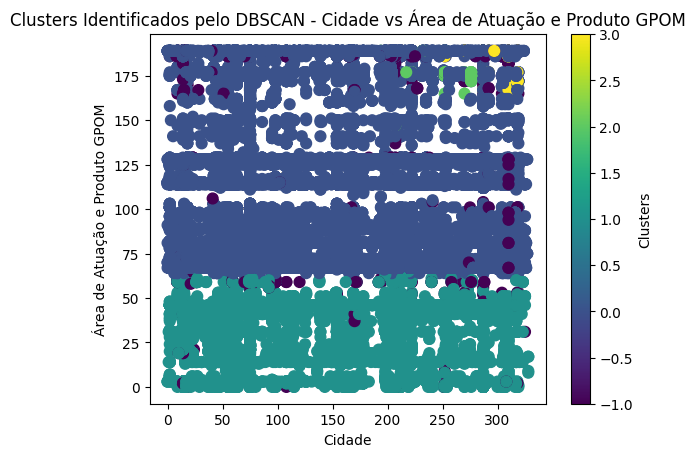

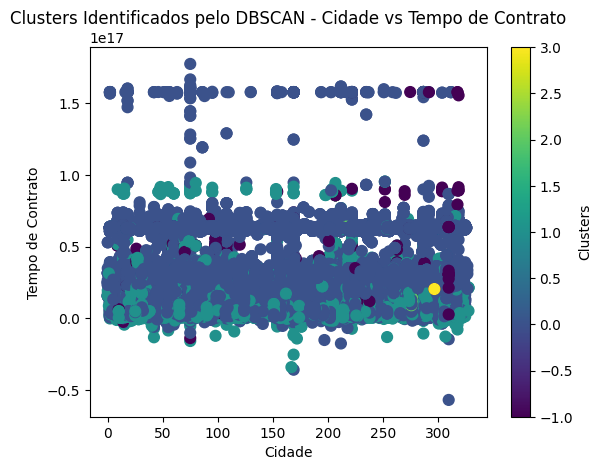

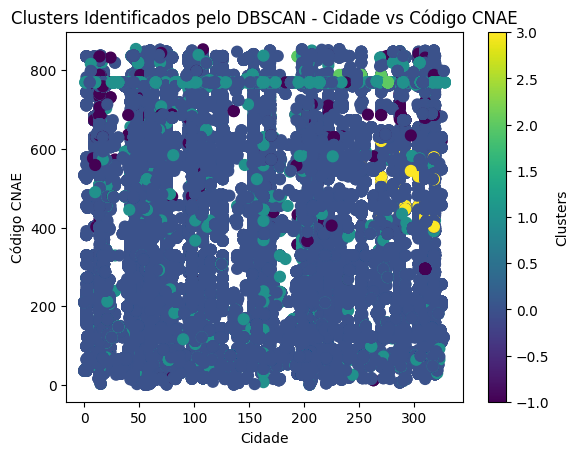

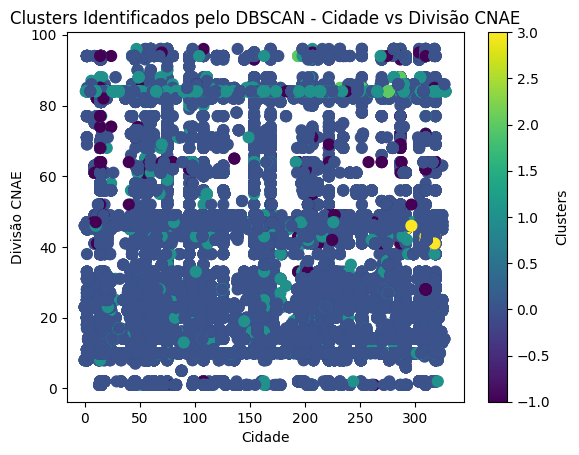

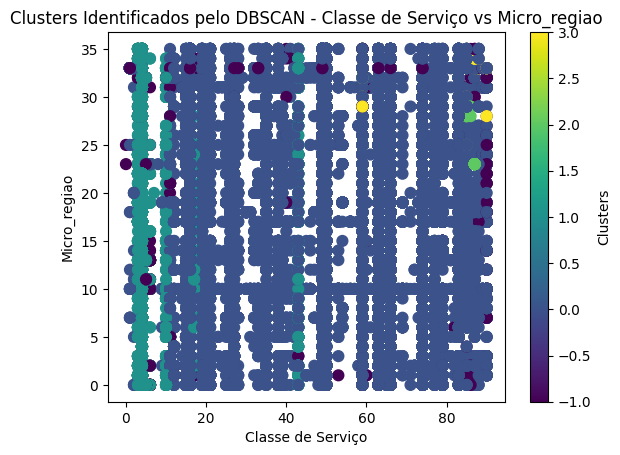

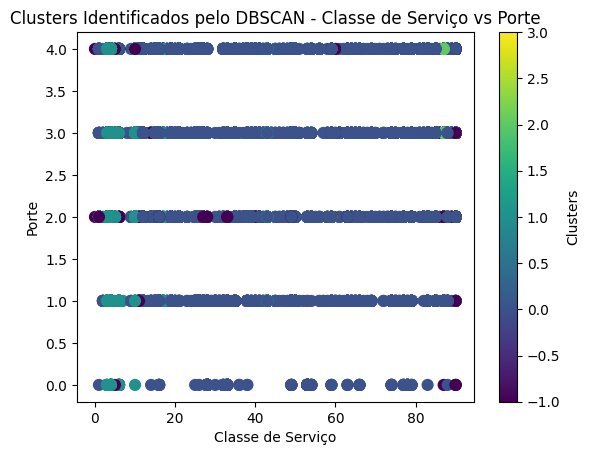

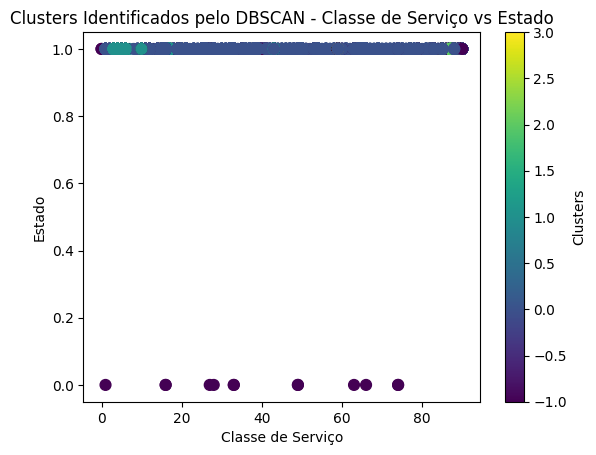

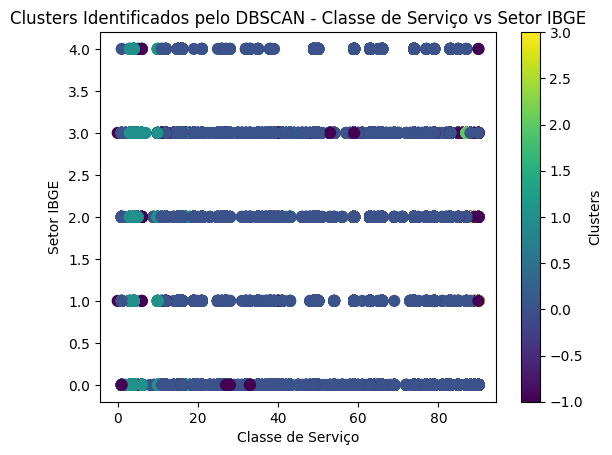

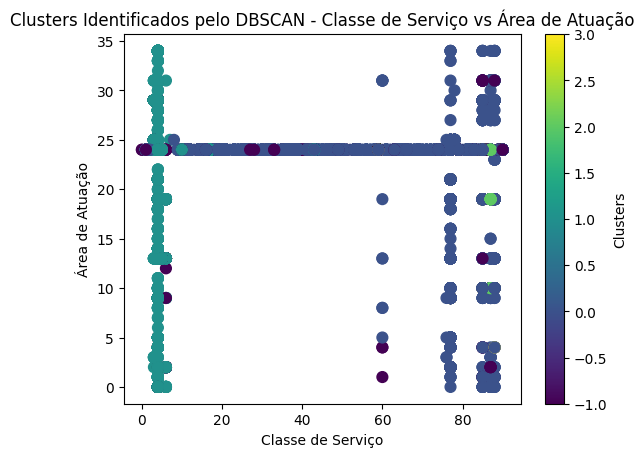

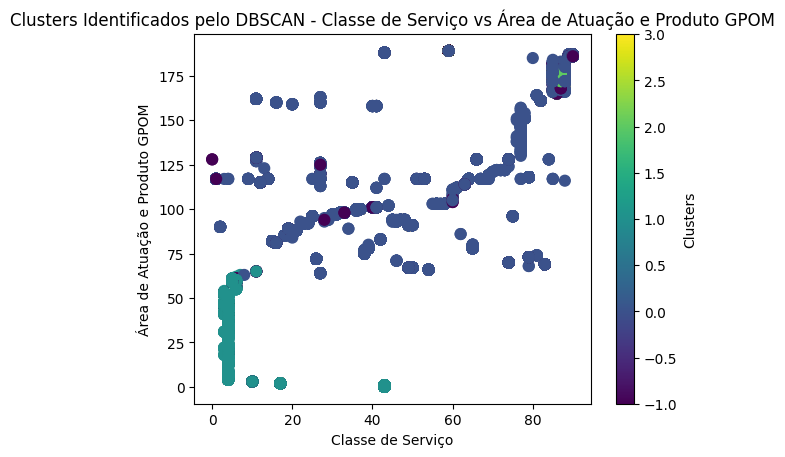

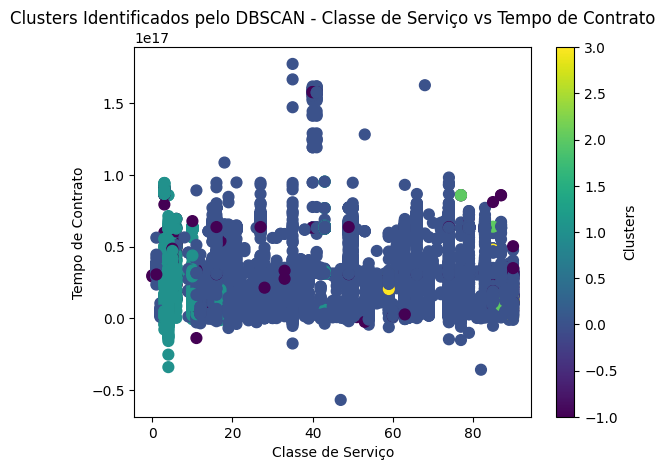

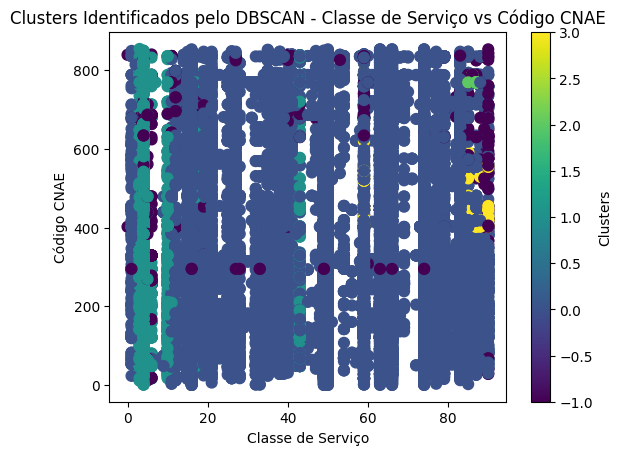

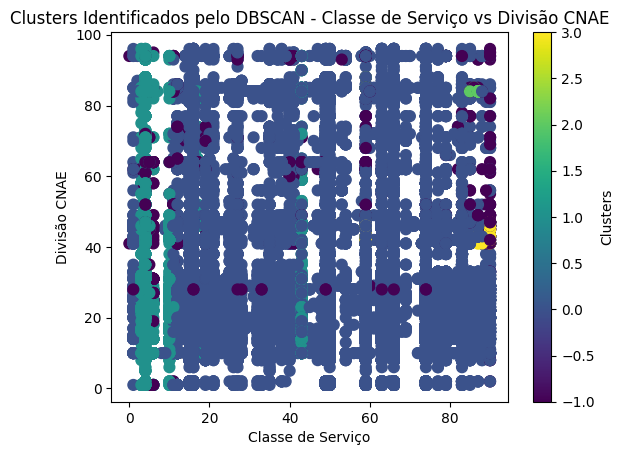

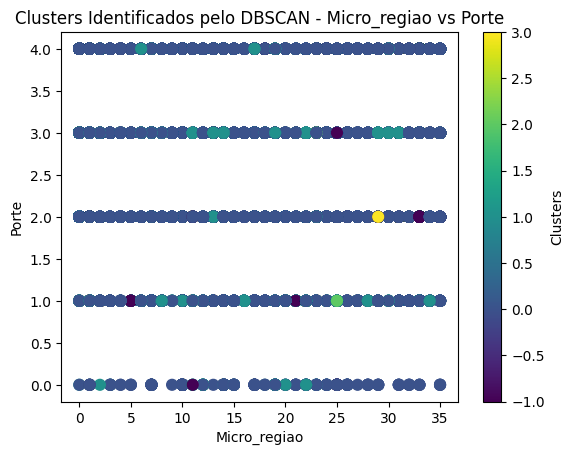

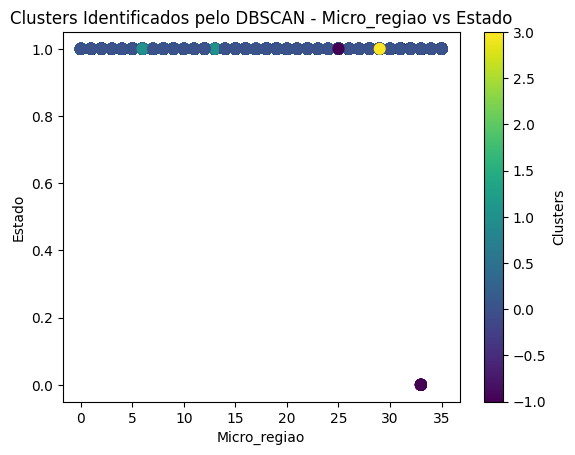

In [45]:
# Exemplo de uso com todas as variáveis possíveis:
colunas = ['ID Cliente', 'Linha de Ação', 'Produto GPOM', 'Cidade',
       'Classe de Serviço', 'Micro_regiao', 'Porte', 'Estado', 'Setor IBGE',
       'Área de Atuação', 'Área de Atuação e Produto GPOM',
       'Tempo de Contrato', 'Código CNAE', 'Divisão CNAE']

# Vamos visualizar os clusters para todas as combinações possíveis de variáveis:
for i in range(len(colunas)):
    for j in range(i+1, len(colunas)):
        plot_clusters(colunas[i], colunas[j], 'Clusters_DBSCAN')